In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_chat =pd.read_csv('dialogs.txt',sep='\t',names=['Questions', 'Answers']) #getting data

In [3]:
df_chat.head()

,Questions,Answers
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [4]:
df_chat.shape

(3725, 2)

## EDA

In [5]:
df_chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  3725 non-null   object
 1   Answers    3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [6]:
df_chat.describe()

,Questions,Answers
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [7]:
#let's check it using groupby
df_chat.groupby('Questions').describe()

Answers         \
                                               count unique   
Questions                                                     
$1,000.                                            1      1   
$140. i can't believe it.                          1      1   
456 cherry drive, pasadena, ca 91170.              1      1   
a band-aid might not work.                         1      1   
a blind date doesn't mean that she is blind!       1      1   
...                                              ...    ...   
your sleeves are not tissues.                      1      1   
your wallet is empty?                              1      1   
your white shirt is ruined.                        1      1   
yuck! no water for me.                             1      1   

and you know you should be glad!                  1      1   

                                                                                               \
                                                                                          top   
Questions                                                                                       
$1,000.                                                  well, that should get you something.   
$140. i can't believe it.                                         what are you talking about?   
456 cherry drive, pasadena, ca 91170.                                         that's correct.   
a band-aid might not work.                    i must not use this finger until the cut heals.   
a blind date doesn't mean that she is blind!                               what does it mean?   
...                                                                                       ...   
your sleeves are not tissues.                      but mom, all my friends use their sleeves.   
your wallet is empty?                                     i don't have even one dollar in it.   
your white shirt is ruined.                                    so, i'll just buy another one.   
yuck! no water for me.                           i wonder if the cooks' nails are dirty, too.   

and you know you should be glad!                                          what a great song.   

                                                   
                                             freq  
Questions                                          
$1,000.                                         1  
$140. i can't believe it.                       1  
456 cherry drive, pasadena, ca 91170.           1  
a band-aid might not work.                      1  
a blind date doesn't mean that she is blind!    1  
...                                           ...  
your sleeves are not tissues.                   1  
your wallet is empty?                           1  
your white shirt is ruined.                     1  
yuck! no water for me.                          1  

and you know you should be glad!               1  

[3510 rows x 4 columns]

In [8]:
df_chat['length'] = df_chat['Answers'].apply(len)
df_chat.head()

,Questions,Answers,length
0,"hi, how are you doing?",i'm fine. how about yourself?,29
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,35
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,33
3,no problem. so how have you been?,i've been great. what about you?,32
4,i've been great. what about you?,i've been good. i'm in school right now.,40


<AxesSubplot:ylabel='Frequency'>

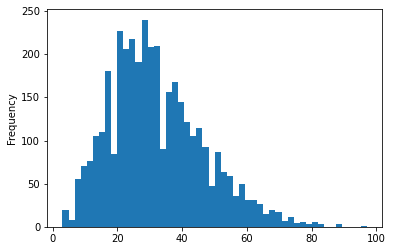

In [9]:
df_chat['length'].plot(bins=50, kind='hist') #let's see the distribution ove length

In [10]:
df_chat.length.describe()

count    3725.000000
mean       32.206980
std        14.542425
min         3.000000
25%        21.000000
50%        30.000000
75%        41.000000
max        97.000000
Name: length, dtype: float64

Well we can see an outlier(answer with length of 97), let's check that

In [11]:
df_chat[df_chat['length'] == 97]['Answers'].iloc[0]

"what if you fall while you're holding the light bulb, and it breaks and pieces go into your eyes?"

## Text Preprocessing

In [12]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subzz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
line = 'Sample line! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in line if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [14]:
nopunc.split()

['Sample', 'line', 'Notice', 'it', 'has', 'punctuation']

In [15]:
# Now just remove any stopwords
clean_line = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_line

['Sample', 'line', 'Notice', 'punctuation']

Now let's make function to apply on our dataframe

In [16]:
def processing(line):
    nopunc = [char for char in line if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
df_chat['Questions'].apply(processing)

0                                                   [hi]
1                                             [im, fine]
2                     [im, pretty, good, thanks, asking]
3                                              [problem]
4                                           [ive, great]
                              ...                       
3720            [thats, good, question, maybe, old, age]
3721                                       [righthanded]
3722                                         [yes, life]
3723    [youre, wearing, right, hand, stop, using, much]
3724                              [writing, right, hand]
Name: Questions, Length: 3725, dtype: object

In [49]:
df_chat['Answers'].apply(processing)

0                                              [im, fine]
1                      [im, pretty, good, thanks, asking]
2                                               [problem]
3                                            [ive, great]
4                          [ive, good, im, school, right]
                              ...                        
3720                                        [righthanded]
3721                                          [yes, life]
3722     [youre, wearing, right, hand, stop, using, much]
3723                               [writing, right, hand]
3724    [start, typing, instead, way, left, hand, half...
Name: Answers, Length: 3725, dtype: object

In [19]:
df_chat.head()

,Questions,Answers,length
0,"hi, how are you doing?",i'm fine. how about yourself?,29
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,35
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,33
3,no problem. so how have you been?,i've been great. what about you?,32
4,i've been great. what about you?,i've been good. i'm in school right now.,40


In [20]:
from textblob import TextBlob

In [21]:
#function to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_chat['Subjectivity'] = df_chat['Answers'].apply(getSubjectivity)
df_chat['Polarity'] = df_chat['Answers'].apply(getPolarity)

In [22]:
df_chat.head()

,Questions,Answers,length,Subjectivity,Polarity
0,"hi, how are you doing?",i'm fine. how about yourself?,29,0.500000,0.416667
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,35,0.600000,0.383333
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,33,0.000000,0.000000
3,no problem. so how have you been?,i've been great. what about you?,32,0.750000,0.800000
4,i've been great. what about you?,i've been good. i'm in school right now.,40,0.567857,0.492857


In [23]:
from wordcloud import WordCloud, STOPWORDS

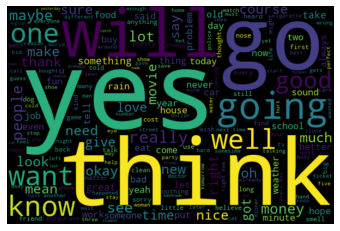

In [24]:
stopwords = set(STOPWORDS)
Words = ''.join([answer for answer in df_chat['Answers']])
wordcloud = WordCloud(width=600, height=400, stopwords=stopwords, random_state=21, max_font_size=200).generate(Words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
#get the positive, negative and neutral analysis
def txtAnalysis(polar_value):
    if polar_value>0:
        return 'Positive'
    elif polar_value==0:
        return 'Neutral'
    else:
        return 'Negative'
    
df_chat['Analysis'] = df_chat['Polarity'].apply(txtAnalysis)
df_chat.head()

,Questions,Answers,length,Subjectivity,Polarity,Analysis
0,"hi, how are you doing?",i'm fine. how about yourself?,29,0.500000,0.416667,Positive
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,35,0.600000,0.383333,Positive
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,33,0.000000,0.000000,Neutral
3,no problem. so how have you been?,i've been great. what about you?,32,0.750000,0.800000,Positive
4,i've been great. what about you?,i've been good. i'm in school right now.,40,0.567857,0.492857,Positive


In [26]:
#Let's count the number of positive and negative tweets
P = df_chat[df_chat['Analysis']=='Positive'].value_counts().sum()
print('The number of positive tweets are: ', P)

N = df_chat[df_chat['Analysis']=='Negative'].value_counts().sum()
print('The number of negative tweets are: ', N)

The number of positive tweets are:  1049
The number of negative tweets are:  434


In [27]:
txt=df_chat.copy()

In [28]:
txt.reset_index(inplace=True)
txt.head()

,index,Questions,Answers,length,Subjectivity,Polarity,Analysis
0,0,"hi, how are you doing?",i'm fine. how about yourself?,29,0.500000,0.416667,Positive
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,35,0.600000,0.383333,Positive
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?,33,0.000000,0.000000,Neutral
3,3,no problem. so how have you been?,i've been great. what about you?,32,0.750000,0.800000,Positive
4,4,i've been great. what about you?,i've been good. i'm in school right now.,40,0.567857,0.492857,Positive


In [29]:
txt['Answers'][5]

'what school do you go to?'

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(txt)):
    review = re.sub('[^a-zA-Z]', ' ', txt['Answers'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
corpus[3]

'great'

In [33]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [34]:
X.shape

(3725, 5000)

In [35]:
y=txt['Analysis']

In [36]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [37]:
tfidf_v.get_feature_names()[:20]

['abl',
 'absolut',
 'accid',
 'actor',
 'actual',
 'ad',
 'add',
 'address',
 'afford',
 'age',
 'ago',
 'agre',
 'aid',
 'air',
 'air rain',
 'airport',
 'allow',
 'almost',
 'almost everi',
 'almost everi day']

In [38]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [39]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()

,abl,absolut,accid,actor,actual,ad,add,address,afford,age,...,young,young enough,young enough daughter,young son,yuck,yuck water,yy,yy mean,zip,zip code
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MultinomialNB Algorithm

In [40]:
from sklearn.naive_bayes import MultinomialNB
cls=MultinomialNB()

In [41]:
cls.fit(X_train, y_train)
prediction = cls.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.92      0.08      0.15       143
     Neutral       0.74      0.99      0.84       755
    Positive       0.88      0.53      0.66       332

    accuracy                           0.76      1230
   macro avg       0.84      0.53      0.55      1230
weighted avg       0.80      0.76      0.71      1230



[[ 12 113  18]
 [  0 748   7]
 [  1 155 176]]


## GaussianNB

In [44]:
from sklearn.naive_bayes import GaussianNB
pas_cls = GaussianNB()

In [45]:
pas_cls.fit(X_train,y_train)

GaussianNB()

In [46]:
pred = pas_cls.predict(X_test)

In [47]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.92      0.08      0.15       143
     Neutral       0.74      0.99      0.84       755
    Positive       0.88      0.53      0.66       332

    accuracy                           0.76      1230
   macro avg       0.84      0.53      0.55      1230
weighted avg       0.80      0.76      0.71      1230



[[ 12 113  18]
 [  0 748   7]
 [  1 155 176]]


Both model are performing with same accuracy